# II - Wing Brakes: Fixed Angle of Attack with QS model
> _If you cannot see the HTML rendering (e.g. colors), view this notebook [here](https://nbviewer.jupyter.org/github/Mipanox/ME303/blob/master/dynamics/Brake.ipynb)_

## <font color="blue">Equations</font>
### <font color="green">Forces</font>
For a pair of wings behaving like brakes via generating constant drag forces with a fixed angle of attack, the quasi-steady model can be applied (cf. the [notebook](https://github.com/Mipanox/ME303/blob/master/dynamics/QS.ipynb)), but with most complication removed:
<br><br>
Let the angle of attack be $\alpha_b$, the translational drag force equation reduces to
<br><br>
$$
\begin{align}
\mathbf{F_{d,\text{brake}}} &\equiv \sum_e\frac{1}{2}\rho c\left \| \mathbf{u_e} \right \|^2C_D(\alpha)\delta r \\
                            &     = \frac{1}{2}\rho S_\text{wing} \left \| \mathbf{u_\text{body}} \right \|^2 C_D(\alpha_b)
\end{align}
$$
<br><br>
since all the wing segments are experiencing the same $\alpha_b$ and the non-flapping-wing scenario guarantees $\mathbf{u_e}=\mathbf{u_\text{wing}}=\mathbf{u_\text{body}}$
<br><br>
Note that, this unchanging drag force should give rise to the observed steady deceleration (see the estimates [notebook](https://github.com/Mipanox/ME303/blob/master/others/estimates.ipynb). Moreover, though the lift is irrelevant for the discussion here, it may still be checked.

### <font color="green">Power</font>
High-school physics tells us
<br><br>
$$
\begin{align}
P_{D,\text{brake}} &= \sum_e\mathbf{F_d}\cdot\mathbf{u_e} = \sum_e\left \| F_d \right\|\left \| u_e \right\| \\
                   &= -\int^{t_f}_{t_i}\mathbf{F_{d,\text{brake}}}\left \| u_\text{body} \right\| dt \\
                   &= \mathbf{F_{d,\text{brake}}}\left \| u_\text{body,mean} \right\|
\end{align}
$$
<br><br>
where the integral from initial to final time becomes taking the mean value of the decelerating speed.

---
## <font color="blue">Parameters</font>
_(See also the model [notebook](https://github.com/Mipanox/ME303/blob/master/dynamics/models.ipynb) for assumptions)_<br>
_(Note: All the numbers are based on the kinematics (see the kinematics [notebook](https://github.com/Mipanox/ME303/blob/master/kinematics/kinematics.ipynb) and [estimates](https://github.com/Mipanox/ME303/blob/master/others/estimates.ipynb))_

In [2]:
exec(open('../codes/preset.py').read())
%matplotlib inline

In [13]:
## read in parameters
sho_df = pd.read_csv('../others/par_data/sho_par.csv')
avo_df = pd.read_csv('../others/par_data/avo_par.csv')

In [14]:
sho_df

,Unnamed: 0,vx_sf,vx_de,vx_ld,t_dec,w_f,w_a,foot_ang,foot_len,body_m,wing_a,wing_r,ang
0,0,1434.8684,764.809273,89.894818,0.501044,6.632416,21.709066,10,10,600,15,35,20


In [15]:
avo_df

,Unnamed: 0,vx_sf,vx_de,vx_ld,t_dec,w_f,w_a,body_m,wing_a,wing_r,ang
0,0,638.215281,283.721562,13.27431,0.350405,6.632416,21.709066,300,15,35,60


---
1. Avocet: 
<br><p style="text-indent: 30px">`speed` $u_\text{body,mean} \approx 285$cm/s on average
<br><p style="text-indent: 30px">`angle` $\approx60^\circ$

2. Shoveler
<br><p style="text-indent: 30px">`speed` $u_\text{body,mean} \approx 765$cm/s on average
<br><p style="text-indent: 30px">`angle` $\approx20^\circ$

### <font color="red">Calculations</font>

In [53]:
## parameters
body_mv_sho = float(sho_df['vx_de']) * u.cm/u.s
body_mv_avo = float(avo_df['vx_de']) * u.cm/u.s

body_sv_sho = float(sho_df['vx_sf']) * u.cm/u.s
body_sv_avo = float(avo_df['vx_sf']) * u.cm/u.s

wing_alp_sho = float(sho_df['ang']) * u.deg
wing_alp_avo = float(avo_df['ang']) * u.deg

wing_a = float(sho_df['wing_a']) * u.cm
wing_r = float(sho_df['wing_r']) * u.cm

## body masses
sho_m = float(sho_df['body_m']) * u.g
avo_m = float(avo_df['body_m']) * u.g

## decel. time scale
t_dec_sho = float(sho_df['t_dec']) * u.s
t_dec_avo = float(avo_df['t_dec']) * u.s

In [102]:
exec(open('../codes/brake.py').read())

## <font color="blue">Results</font>

In [103]:
## two birds
sho = Brake(wing_a,wing_r,wing_alp_sho,body_mv_sho,body_sv_sho,t_dec_sho,sho_m)
avo = Brake(wing_a,wing_r,wing_alp_avo,body_mv_avo,body_sv_avo,t_dec_avo,sho_m)

avo_fd = avo.transl_force()
sho_fd = sho.transl_force()

avo_pd = avo.transl_d_power()
sho_pd = sho.transl_d_power()

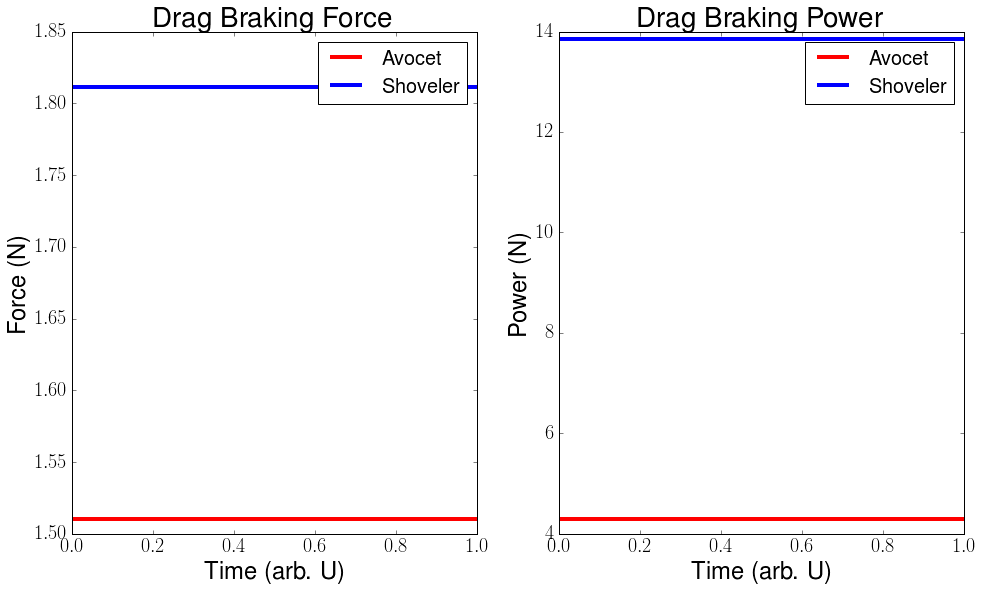

In [109]:
## plotting
### forces
plt.figure(figsize=(16,9))

plt.subplot(121)
plt.plot([0,1],[avo_fd.value]*2,'r',label='Avocet',lw=4)
plt.plot([0,1],[sho_fd.value]*2,'b',label='Shoveler',lw=4)
plt.legend(); plt.xlabel('Time (arb. U)'); plt.ylabel('Force (N)')
plt.title('Drag Braking Force')

### powers
plt.subplot(122)
plt.plot([0,1],[avo_pd.value]*2,'r',label='Avocet',lw=4)
plt.plot([0,1],[sho_pd.value]*2,'b',label='Shoveler',lw=4)
plt.legend(); plt.xlabel('Time (arb. U)'); plt.ylabel('Power (W)')
plt.title('Drag Braking Power')

Amazingly, although the avocet has a larger angel of attack, the slower speed makes the drag smaller.

In [105]:
sho_dec_v = sho.decele()
avo_dec_v = avo.decele()

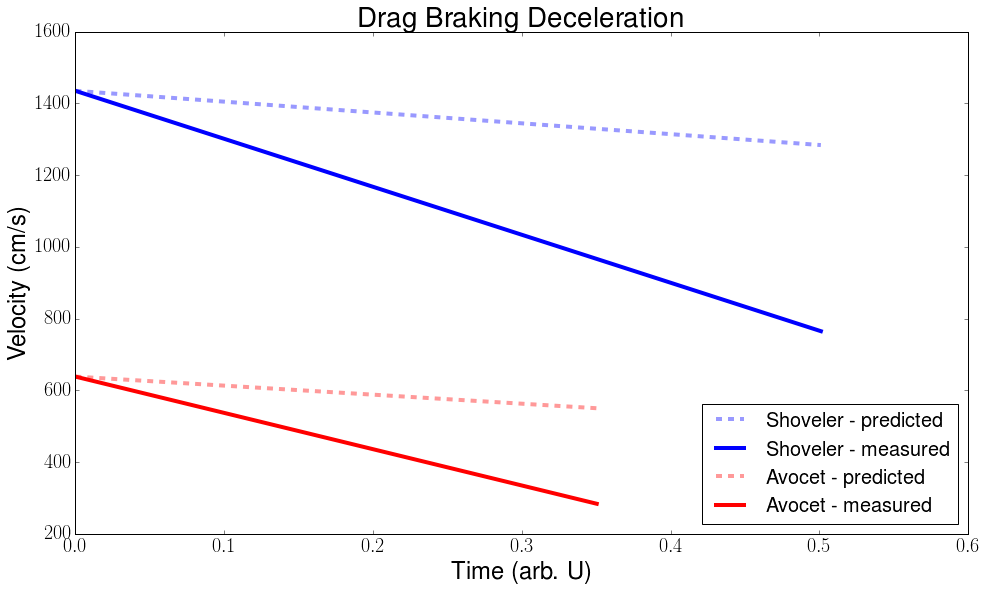

In [106]:
plt.figure(figsize=(16,9))
plt.plot([0,t_dec_sho.value],[body_sv_sho.value,sho_dec_v.value],'b--',label='Shoveler - predicted',lw=4,alpha=0.4)
plt.plot([0,t_dec_sho.value],[body_sv_sho.value,body_mv_sho.value],'b',label='Shoveler - measured',lw=4)

plt.plot([0,t_dec_avo.value],[body_sv_avo.value,avo_dec_v.value],'r--',label='Avocet - predicted',lw=4,alpha=0.4)
plt.plot([0,t_dec_avo.value],[body_sv_avo.value,body_mv_avo.value],'r',label='Avocet - measured',lw=4)
plt.legend(loc='lower right'); plt.xlabel('Time (arb. U)'); plt.ylabel('Velocity (cm/s)')
plt.title('Drag Braking Deceleration')

_(Note: the forces are computed at the "initial" speed)_<br>
The discrepancies are ostensibly large. I suspect this is either because we did not take into account of any wing motions (e.g. wings were somewhat flapping), or because the body drag rises as the cross-sectional body area increases. Even more plausible is that there was a draft, which would greatly increase the effective speed, and the aerodynamic forces scale as the square of it. In fact, northern shovelers do flap their wings in a "for-and-backward" way:

In [113]:
from IPython.display import YouTubeVideo
YouTubeVideo('xa8I5be9ipM', start=29, width=720, height=480)

---
### <font color="brown">Forward-flapping Correction</font>
The video clip suggests that we should add this factor into the QS analysis. Let us vary the wing stroke plane angles (vertical flapping is 90 degrees).
<br>
_(A quick inspection at the X/Y-position profiles supports this. See the plots in [kinematics](https://github.com/Mipanox/ME303/blob/master/kinematics/kinematics.ipynb))_

In [126]:
exec(open('../codes/qs.py').read())

In [164]:
wing_fre = float(sho_df['w_f']) * u.Hz
wing_amp = 50. * u.cm # see kinematcs x-position

sho_10 = QS(wing_fre,wing_amp,wing_a,wing_r,body_sv_sho,sp_ang=10.*u.deg)
sho_20 = QS(wing_fre,wing_amp,wing_a,wing_r,body_sv_sho,sp_ang=20.*u.deg)
sho_30 = QS(wing_fre,wing_amp,wing_a,wing_r,body_sv_sho,sp_ang=30.*u.deg)
sho_40 = QS(wing_fre,wing_amp,wing_a,wing_r,body_sv_sho,sp_ang=40.*u.deg)
sho_90 = QS(wing_fre,wing_amp,wing_a,wing_r,body_sv_sho,sp_ang=90.*u.deg)

In [165]:
def plot_forces(sho_,c,deg):
    t_sho = np.linspace(0,1,len(sho_.time_step))
    sho_fv,sho_fh,sho_fv_f,sho_fh_f = sho_.transl_forces()
    plt.plot(t_sho,sho_fv,'-.',c=c,lw=4,alpha=0.4)
    plt.plot(t_sho,sho_fh,'-',c=c,lw=4,label=deg)
    plt.plot(t_sho,sho_fv_f,':',c=c,lw=4,alpha=0.4)
    plt.plot(t_sho,sho_fh_f,'--',c=c,lw=4)

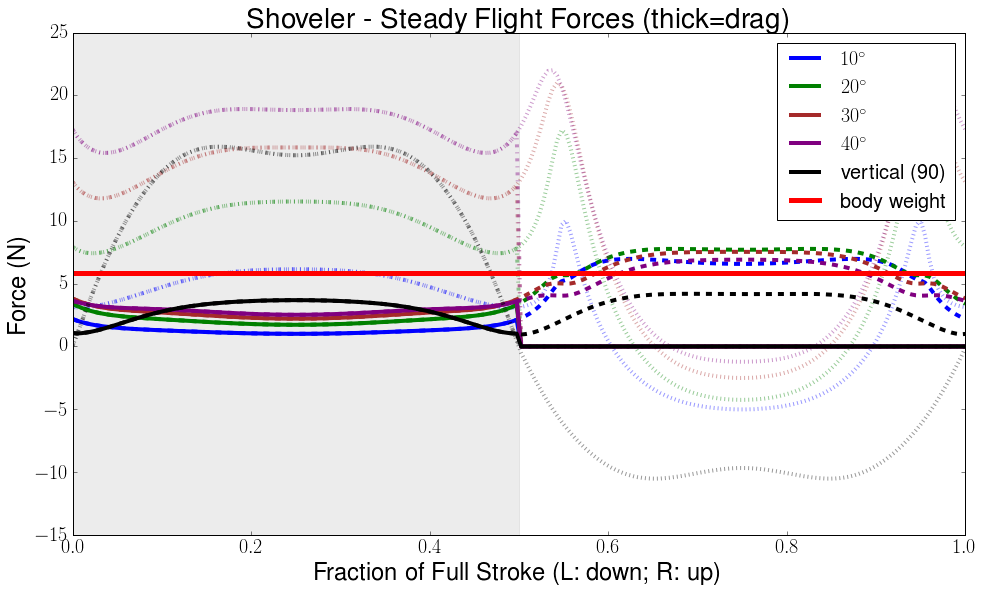

In [167]:
t_sho = np.linspace(0,1,len(sho_00.time_step))
sho_fv,sho_fh,sho_fv_f,sho_fh_f = sho_00.transl_forces()

plt.figure(figsize=(16,9))

plot_forces(sho_10,'b',r'$10^\circ$')
plot_forces(sho_20,'g',r'$20^\circ$')
plot_forces(sho_30,'brown',r'$30^\circ$')
plot_forces(sho_40,'purple',r'$40^\circ$')
plot_forces(sho_90,'k','vertical (90)')

plt.plot([0,1],[sho_w]*2,'r-',label='body weight',lw=5)
plt.axvspan(0, 0.5, alpha=0.15, color='grey')
plt.title('Shoveler - Steady Flight Forces (thick=drag)')
plt.legend(loc='upper right'); 
plt.xlabel('Fraction of Full Stroke (L: down; R: up)'); plt.ylabel('Force (N)')

Some information can be read off here:
* Shoveler does not flap with this large amplitude as is unnecessary.
* With stroke plane more aligned with the horizontal, the bird experiences more braking force. The optimal angle is probably around $20^\circ$, in the upstrokes
* This increased braking force compensates the insufficient decelerating force if the wings were treated non-flapping

In [178]:
## average force, take 20 deg
body_m = float(sho_df['body_m']) * u.g
f_20 = np.mean(sho_20.transl_forces()[3]) * u.N

In [188]:
## final velocities
at_20 = (f_20 / body_m * t_dec_sho).to(u.cm/u.s) ## 20 deg
at_nf = (sho_fd / body_m * t_dec_sho).to(u.cm/u.s) ## non-flapping

v_f_nf  = body_sv_sho - at_nf
v_f_20  = body_sv_sho - at_20

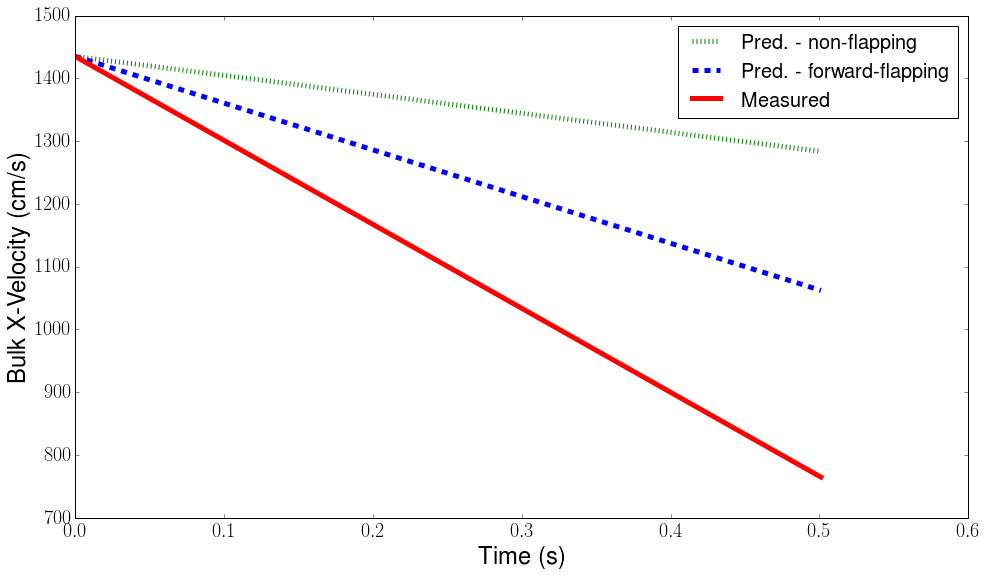

In [190]:
plt.figure(figsize=(16,9))
plt.plot([0,t_dec_sho.value],[body_sv_sho.value,v_f_nf.value],'g:',label='Pred. - non-flapping',lw=5)
plt.plot([0,t_dec_sho.value],[body_sv_sho.value,v_f_20.value],'b--',label='Pred. - forward-flapping',lw=5)
plt.plot([0,t_dec_sho.value],[body_sv_sho.value,body_mv_sho.value],'r',label='Measured',lw=5)
plt.legend(); plt.xlabel('Time (s)'); plt.ylabel('Bulk X-Velocity (cm/s)')

This is an amazing improvement!! Obviously flapping is of significant importance in the landing process. Let's turn to water-skiing...